In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline


In [88]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [77]:
N = 300
X, y = datasets.make_moons(N, noise=0.3)

In [90]:
Y = y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

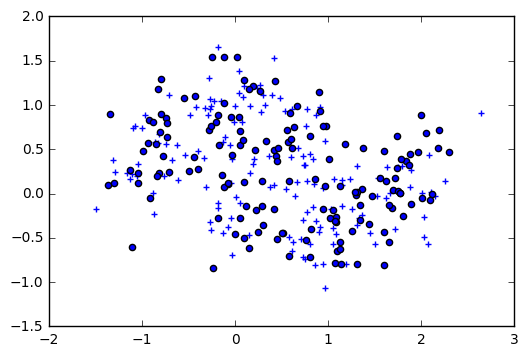

In [91]:
plt.scatter(X[:150,0],X[:150,1], marker='+')
plt.scatter(X[150:,0], X[150:,1])

In [92]:
num_hidden = 2


In [93]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [95]:
#入力層
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [96]:
#隱層 - 出力層
V =  tf.Variable(tf.truncated_normal([num_hidden,1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

In [97]:
cross_entropy = -tf.reduce_sum ( t * tf.log(y) + (1-t)*tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [98]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [106]:
batch_size = 20
n_batches = N 
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    if epoch % 20 == 0:
        print("epoch:", epoch)
    for i in range(n_batches):
        start = i * batch_size
        end   = start + batch_size
    
            
        sess.run(train_step, feed_dict={
                x:X_[start:end],
                t:Y_[start:end]
            })

epoch: 0
epoch: 20
epoch: 40
epoch: 60
epoch: 80
epoch: 100
epoch: 120
epoch: 140
epoch: 160
epoch: 180
epoch: 200
epoch: 220
epoch: 240
epoch: 260
epoch: 280
epoch: 300
epoch: 320
epoch: 340
epoch: 360
epoch: 380
epoch: 400
epoch: 420
epoch: 440
epoch: 460
epoch: 480


In [101]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={
        x:X_test,
        t:Y_test
    })

In [102]:
print('accuracy:', accuracy_rate)

accuracy: 0.883333
